In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import FlowCal
import scipy.stats as stats

seed = 42
random.seed(seed)
np.random.seed(seed)


In [7]:
# Compute histogram of pairwise distances for random sample of s01

def pairwise_distances(S, nbins):

    N = S.shape[0]
    distances = np.linalg.norm((S[1:] - S[0]), axis=1)
    for i in range(1, N-1):
        s = S[i]
        V = S[i+1:]
        d = np.linalg.norm((V - s), axis=1)

        distances = np.append(distances, d)

    H = np.histogram(distances, bins=nbins)
    
    return distances, H

Text(0.5, 1.0, 'Histogram of Original Pair-wise Distances, 1000 samples')

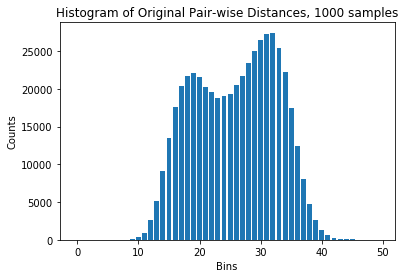

In [9]:
# Original distance histogram

data_dir = "SamusikData/"
s01_fn = data_dir + "BM2_cct_normalized_01_non-Neutrophils.fcs"
s01 = FlowCal.io.FCSData(s01_fn)

# Only relevant indexes are 10-47
s01 = s01[:, 10:47]

# Sample random indices
N = 1000
idx = np.random.randint(s01.shape[0], size=N)

# Transform data with arcsinh
s01 = np.arcsinh(np.array(s01))

origD, origH = pairwise_distances(s01[idx], 50)

plt.figure()
plt.bar(np.arange(50), origH[0])
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.title("Histogram of Original Pair-wise Distances, 1000 samples")

Text(0.5, 1.0, 'Histogram of tsne Pair-wise Distances, 1000 samples')

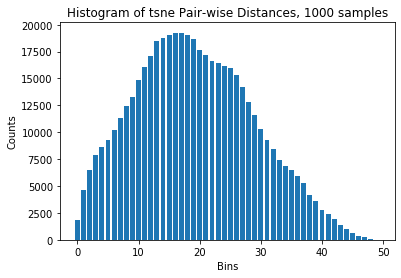

In [10]:
# TSNE histogram
s01_tsne = np.load("Embeddings/s01_tsne.npy")
tsne_D, tsne_H = pairwise_distances(s01_tsne[idx], 50)

plt.figure()
plt.bar(np.arange(50), tsne_H[0])
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.title("Histogram of tsne Pair-wise Distances, 1000 samples")


Text(0.5, 1.0, 'Histogram of umap Pair-wise Distances, 1000 samples')

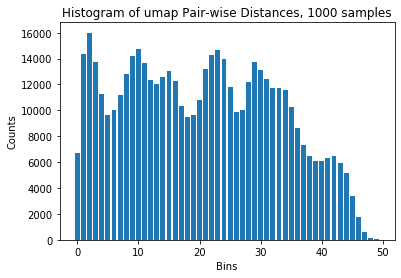

In [12]:
# umap histogram
s01_umap = np.load("Embeddings/s01_umap.npy")
umap_D, umap_H = pairwise_distances(s01_umap[idx], 50)

plt.figure()
plt.bar(np.arange(50), umap_H[0])
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.title("Histogram of umap Pair-wise Distances, 1000 samples")



Text(0.5, 1.0, 'Histogram of 2layer Pair-wise Distances, 1000 samples')

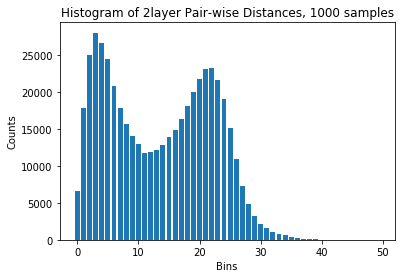

In [13]:
# 2 layer AE histogram
s01_2layer = np.load("Embeddings/s01_2layer.npy")
twolayer_D, twolayer_H = pairwise_distances(s01_2layer[idx], 50)

plt.figure()
plt.bar(np.arange(50), twolayer_H[0])
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.title("Histogram of 2layer Pair-wise Distances, 1000 samples")

Text(0.5, 1.0, 'Histogram of 6layer Pair-wise Distances, 1000 samples')

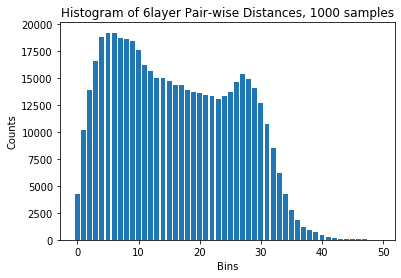

In [14]:
# 6 layer AE histogram
s01_6layer = np.load("Embeddings/s01_6layer.npy")
sixlayer_D, sixlayer_H = pairwise_distances(s01_6layer[idx], 50)

plt.figure()
plt.bar(np.arange(50), sixlayer_H[0])
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.title("Histogram of 6layer Pair-wise Distances, 1000 samples")

Text(0.5, 1.0, 'Histogram of vae Pair-wise Distances, 1000 samples')

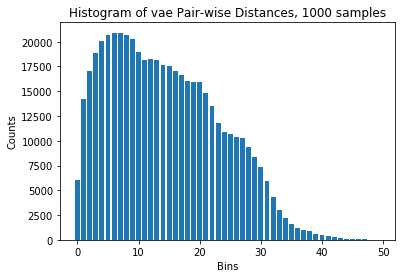

In [15]:
# VAE histogram
s01_vae = np.load("Embeddings/s01_vae.npy")
vae_D, vae_H = pairwise_distances(s01_vae[idx], 50)

plt.figure()
plt.bar(np.arange(50), vae_H[0])
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.title("Histogram of vae Pair-wise Distances, 1000 samples")

Text(0.5, 1.0, "Pearson's R for pair-wise distances between original & embedding")

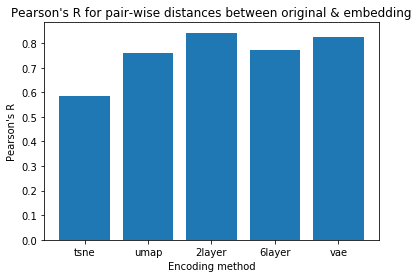

In [38]:
# Compute all correlations
tsne_R, tsne_p = stats.pearsonr(origD, tsne_D)
umap_R, umap_p = stats.pearsonr(origD, umap_D)
twolayer_R, twolayer_p = stats.pearsonr(origD, twolayer_D)
sixlayer_R, sixlayer_p = stats.pearsonr(origD, sixlayer_D)
vae_R, vae_p = stats.pearsonr(origD, vae_D)

fig, ax = plt.subplots()
ax.bar(np.arange(5), [tsne_R, umap_R, twolayer_R, sixlayer_R, vae_R])
ax.set_xticklabels(["", "tsne", "umap", "2layer", "6layer", "vae"])
ax.set_xlabel("Encoding method")
ax.set_ylabel("Pearson's R")
ax.set_title("Pearson's R for pair-wise distances between original & embedding")

